# Seasonal water sub-model - Notebook 4

* **Products used:** 
[cgls_landcover](https://explorer.digitalearth.africa/products/cgls_landcover)

## Background

This notebook calculates and stores the fourth sub-model in the elephant Habitat Suitability Model; the seasonal water sub-model. It is comprised of a single layer from CGLS landcover.

The notebook executes the following steps:

   1. Load landcover CGLS data and select the seasonal water layer.
   2. Within the area of interest, calculate distance to seasonal water quantified as euclidean distance in metres.
   3. Standardise the euclidean distance measure so it ranges between 0 and 1.
   4. Save the results as a sub-model.

### Load packages
Import Python packages that are used for the analysis.

In [1]:
%matplotlib inline

import datacube
import numpy as np
import xarray as xr
from deafrica_tools.plotting import plot_lulc

try:
      import xrspatial
except:
      !pip install xrspatial
    
from xrspatial import proximity

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/usr/local/lib/python3.8/dist-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
/usr/local/lib/python3.8/dist-packages/dask/dataframe/utils.py:367: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pa

### Connect to the datacube

Connect to the datacube so we can access DE Africa data.

In [2]:
dc = datacube.Datacube(app='Elephant-HSM-sw')

## Load CGLS landcover

Spatial parameters must be the same as other notebooks. This is ensured by bringing in the stored `lats` and `lons` variables.

In [3]:
%store -r lons
%store -r lats

query = {'x': lons,
         'y': lats,
         'resolution': (-200, 200),
         'time': '2019',
         'output_crs': 'epsg:6933',
         'measurements': 'seasonalwater_cover_fraction'}
ds_cgls = dc.load(product='cgls_landcover', **query).squeeze()

## Visualise location of seasonal water

In this case we define seasonal water as any location with values > 0 and <= 100 (255 denotes missing values).

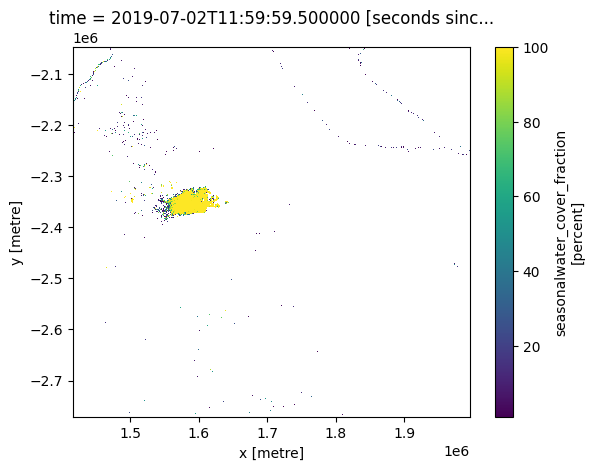

In [4]:
cgls_sw = ds_cgls.where((ds_cgls.seasonalwater_cover_fraction>0) & (ds_cgls.seasonalwater_cover_fraction<=100))
cgls_sw.seasonalwater_cover_fraction.plot()

The cell below calculates euclidean distance on seasonal water, as for other layers. Note that seasonal water is considered positive for elephant habitat so higher values are closer to seasonal water.

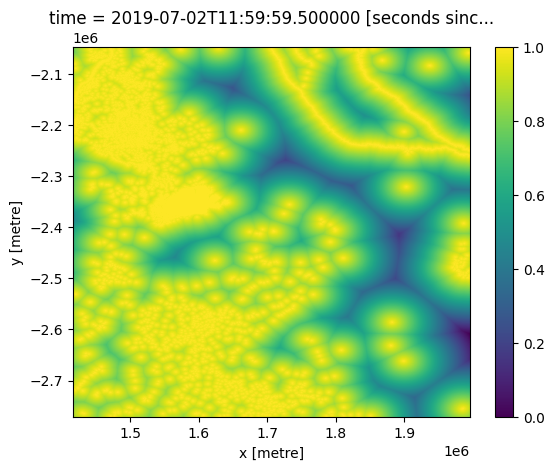

In [5]:
proximity_sw = proximity(cgls_sw.seasonalwater_cover_fraction, distance_metric = 'EUCLIDEAN')

sw_proximity_std = 1 - (proximity_sw/np.max(proximity_sw))
sw_proximity_std = sw_proximity_std.fillna(0)
sw_proximity_std.plot()

## Save to outputs

The seasonal water sub-model is comprised of just one layer so we can save it to outputs for use in the final Habitat Suitability Model.

In [6]:
sw_model = sw_proximity_std.drop('time', dim=None)
sw_model.to_netcdf('outputs/sw_sm.nc')

---

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:**

In [7]:
print(datacube.__version__)

1.8.8


**Last Tested:**

In [8]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2023-04-20'